# Inferential Statistics

1.Hypothesis Testing
2.linear graph for ml
3.anova framework
4.mae,mse,rmse
5.regression table
6.complete stats practical
7.inferential stats & hypothesis testing practice

# 1. Hypothesis Testing

A hypothesis is an idea that can be tested
statemt-hyd apple is expensive
1 apple is 10000-statement become hypothessi
Hypothesis testing divides into two parts

1.Null Hypothesis(H0)-to accept the null hypotheses-when we close to mean
2.Alternative Hypothesis(H1)-to reject the null hypothesis-far from mean

to accept the null hypotheses-when we close to mean
to reject the null hypothesis-far from mean
reject the null hypothesis means to accept thr alternative hypotheisis

p-value==0.05

Error are of two types---->
type 1 error== reject a true null hypothesis= false+ve
type 2 error== accept a false nulll hypothesis= false-ve

these are classification model
 
we will get these error in the confusion matrix




Error-residual
mae-mean absolute error
mse-
rmse-

Anova framework-> Analysis of variance
SSR-sum of square regressor
SSE-sum of square error
SST-sum of square total
r^2-0-1
adjusted r^2-0-1
r^2>=adjusted r^2

# Stats Project

# 1. Importing Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")


# 2. Create the DataSet

In [131]:
# Set the random seed for reproducibility
np.random.seed(42)
# Create a synthetic Dataset
data={
'product_id':range(1,21),
'product_name':[f'Product{i}' for i in range(1,21)],
'category':np.random.choice(['Electronic','Clothing','Home','Sports'],20),
'units_sold':np.random.poisson(lam=20,size=20), #Poissions Distribution for
'Sale_date':pd.date_range(start='2023-01-01',periods=20,freq='D')
}
sales_data=pd.DataFrame(data)
#Displays the first few rows of the dataset
print("Sales Data")
print(sales_data)

Sales Data
    product_id product_name    category  units_sold  Sale_date
0            1     Product1        Home          25 2023-01-01
1            2     Product2      Sports          15 2023-01-02
2            3     Product3  Electronic          17 2023-01-03
3            4     Product4        Home          19 2023-01-04
4            5     Product5        Home          21 2023-01-05
5            6     Product6      Sports          17 2023-01-06
6            7     Product7  Electronic          19 2023-01-07
7            8     Product8  Electronic          16 2023-01-08
8            9     Product9        Home          21 2023-01-09
9           10    Product10    Clothing          21 2023-01-10
10          11    Product11        Home          17 2023-01-11
11          12    Product12        Home          22 2023-01-12
12          13    Product13        Home          14 2023-01-13
13          14    Product14        Home          17 2023-01-14
14          15    Product15      Sports     

In [ ]:
#Save the dataframe as a csv file
sales_data.to_csv('C:/Users/umari/OneDrive/Desktop/FSDS DATASETs/sales_data.csv',index=False)

In [133]:
#Path Location
import os
os.getcwd()

'c:\\Users\\umari\\OneDrive\\Desktop\\Data Science And Ai'

# 3. Descriptive Statistics

In [134]:
# Descriptive statistics
descriptive_stats = sales_data['units_sold'].describe()

# Display Descriptive Statistics
print("\nDescriptive Statistics for Units Sold:")
print(descriptive_stats)

# Additional Statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()  # fixed typo
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

# Group by category total, average, and std deviation
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std'])
category_stats.columns = ['Total Units Sold','Average Units Sold','Std Deviation']  # fixed mismatch

# Display the results
print("\nStatistical Analysis:")
print(f"Mean Unit Sold: {mean_sales}")
print(f"Median Unit Sold: {median_sales}")
print(f"Mode Unit Sold: {mode_sales}")
print(f"Variance Unit Sold: {variance_sales}")
print(f"Standard Deviation of Unit Sold: {std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)



Descriptive Statistics for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Unit Sold: 18.8
Median Unit Sold: 18.5
Mode Unit Sold: 17
Variance Unit Sold: 10.90526315789474
Standard Deviation of Unit Sold: 3.3023117899275864

Category Statistics:
            Total Units Sold  Average Units Sold  Std Deviation
category                                                       
Clothing                  21           21.000000            NaN
Electronic                73           18.250000       2.217356
Home                     181           20.111111       3.723051
Sports                   101           16.833333       2.714160


# 4. Inferential Statistics

In [135]:
# Confidence interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))
# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units sold:
(17.254470507823573, 20.34552949217643)


# 5. Hypothesis Testing

In [136]:
# Hypothesis testing(t-test)
# Null Hypothesis: Mean units sold is equal to 20
# Alternative Hypothesis: Mean units sold is not equal to 20

t_statistic,p_value=stats.ttest_1samp(sales_data['units_sold'],20)
print("\nHypothesis testing (t-test):")
print(f"T-ststistics:{t_statistic},p-value:{p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold id significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: the mean units sold id not significantly different from 20.")


Hypothesis testing (t-test):
T-ststistics:-1.6250928099424466,p-value:0.12061572226781002
Fail to reject the null hypothesis: the mean units sold id not significantly different from 20.


# 6. Visualizations

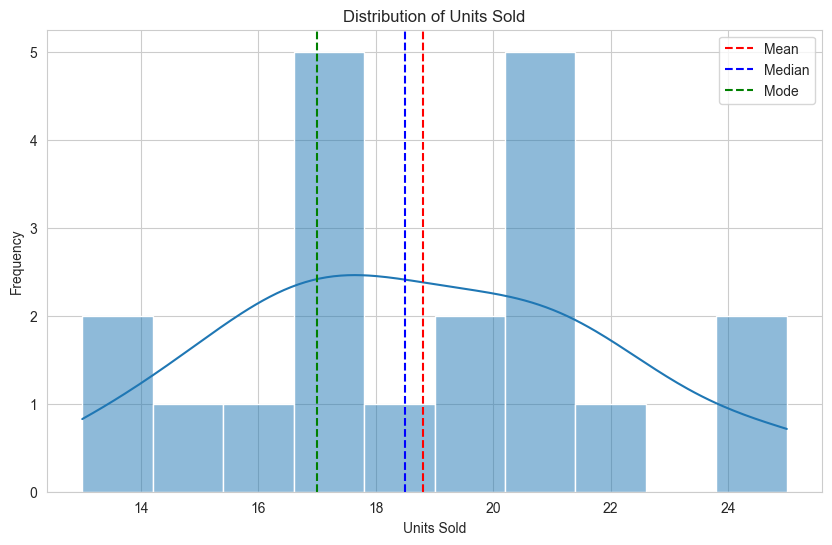

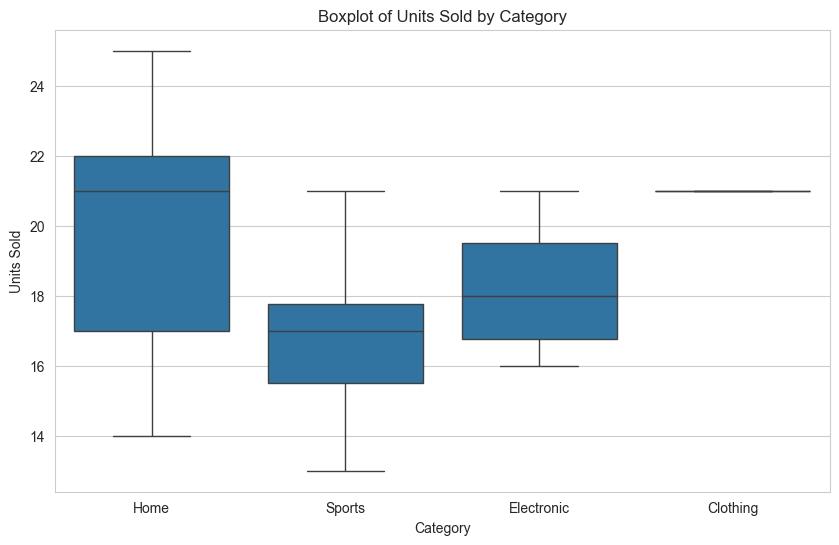

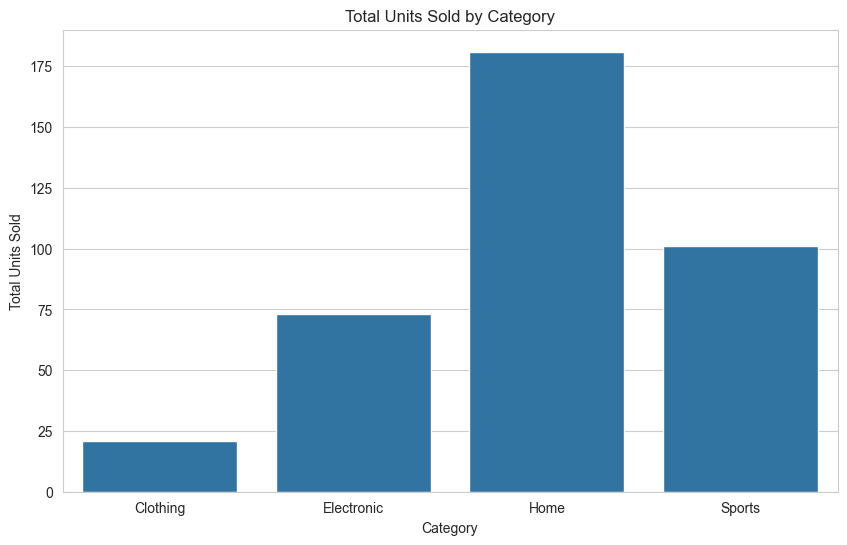

In [137]:
# Visualizations
sns.set_style("whitegrid")

# Plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title("Distribution of Units Sold")
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median')  # fixed typo
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_stats.index, y=category_stats['Total Units Sold'])
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()

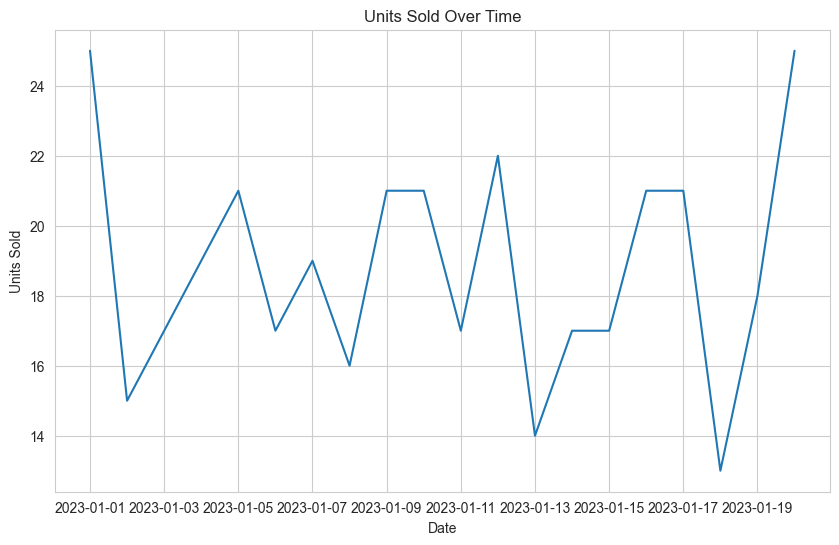

In [138]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sale_date', y='units_sold', data=sales_data)
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

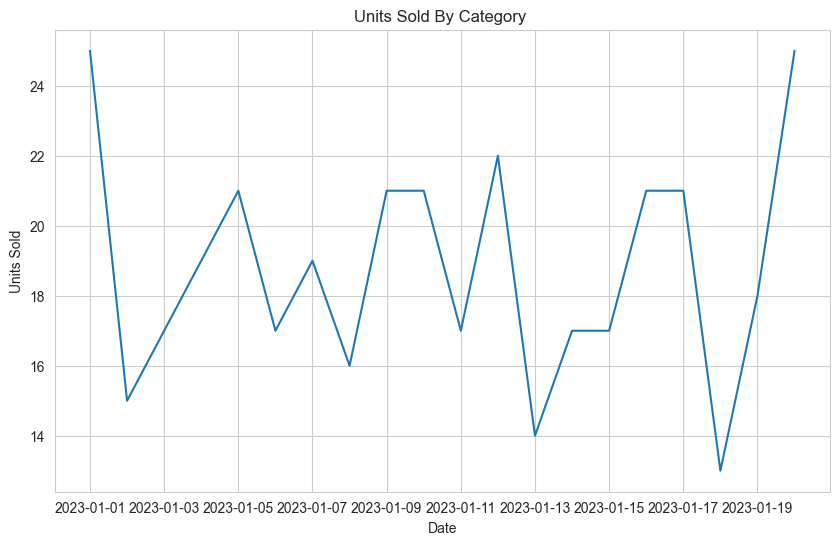

In [139]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sale_date', y='units_sold', data=sales_data)
plt.title('Units Sold By Category ')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

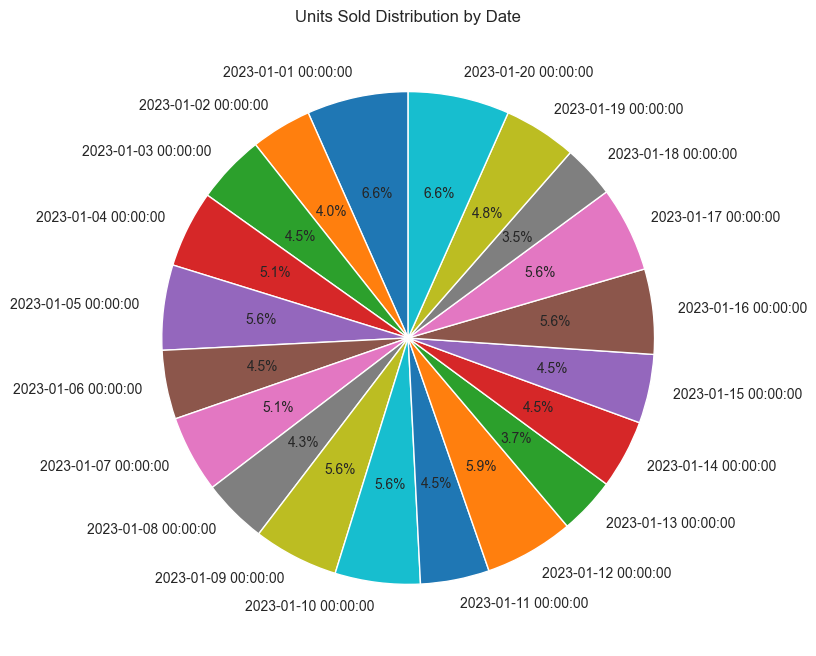

In [140]:
plt.figure(figsize=(8, 8))  
plt.pie(
    sales_data['units_sold'],       
    labels=sales_data['Sale_date'], 
    autopct='%1.1f%%',              
    startangle=90                  
)
plt.title('Units Sold Distribution by Date')
plt.show()

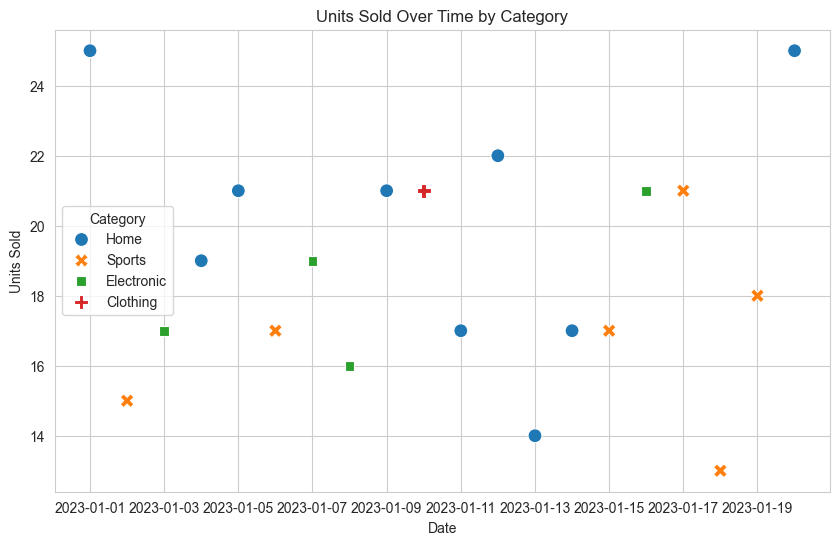

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Sale_date',
    y='units_sold',
    hue='category',       # color points by category
    style='category',     # optional: different markers per category
    data=sales_data,
    s=100                 # point size
)
plt.title('Units Sold Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend(title="Category")
plt.show()


# Stacked Bar Chart – Units Sold per Product, Stacked by Category

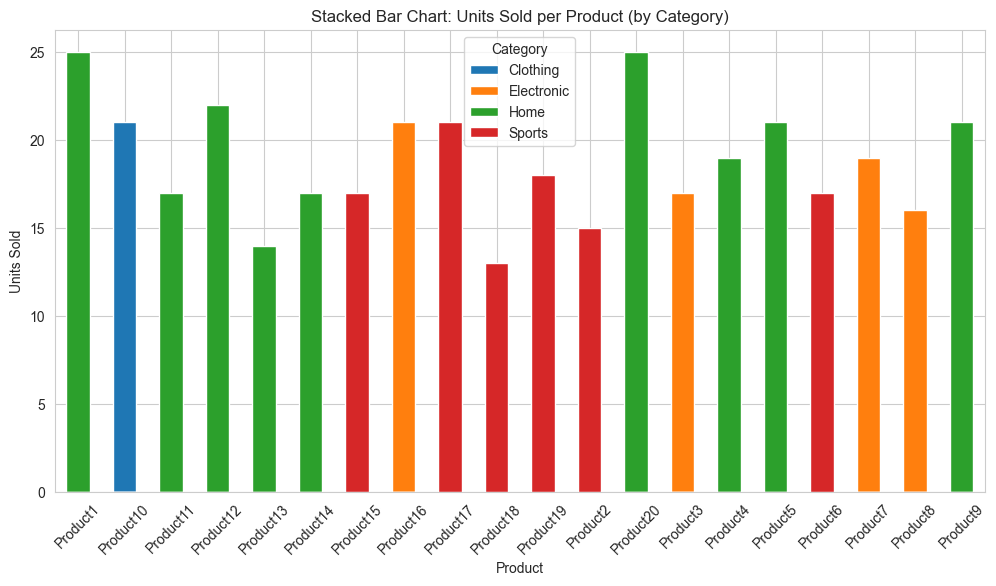

In [142]:
pivot_data = sales_data.pivot_table(index="product_name", columns="category", values="units_sold", aggfunc="sum")

pivot_data.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Stacked Bar Chart: Units Sold per Product (by Category)")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()

# Grouped Bar Chart – Compare Categories Across Products

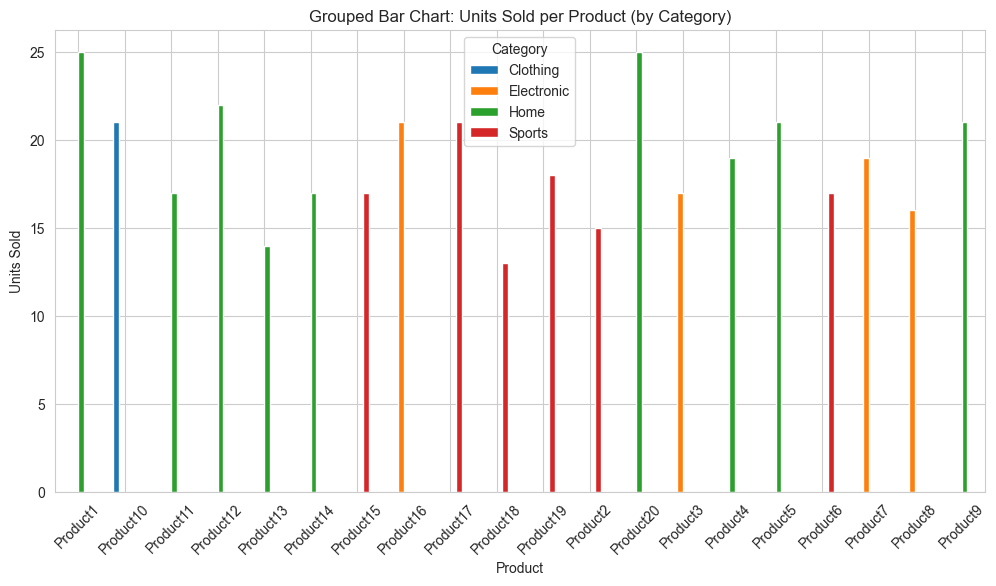

In [143]:
pivot_data.plot(kind="bar", stacked=False, figsize=(12,6))
plt.title("Grouped Bar Chart: Units Sold per Product (by Category)")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()

# Violin Plot – Distribution of Units Sold by Category

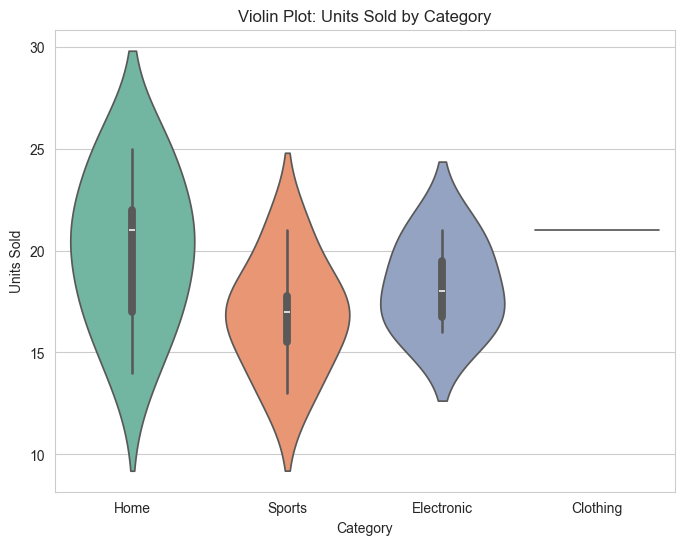

In [144]:
plt.figure(figsize=(8,6))
sns.violinplot(x="category", y="units_sold", data=sales_data, palette="Set2")
plt.title("Violin Plot: Units Sold by Category")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.show()

# KDE Plot (Density Curve) – Units Sold

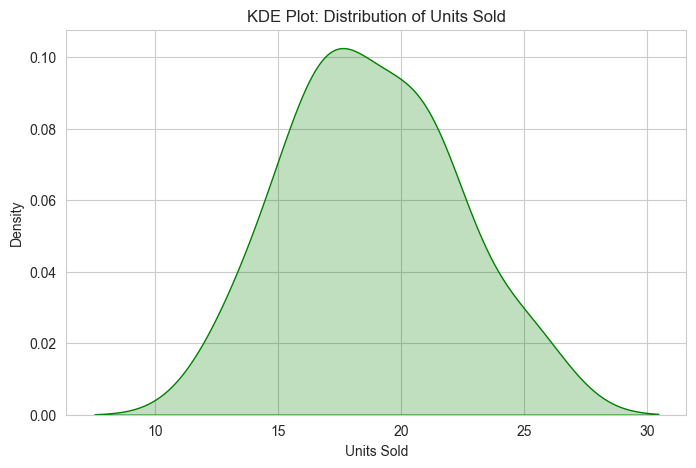

In [145]:
plt.figure(figsize=(8,5))
sns.kdeplot(sales_data['units_sold'], fill=True, color="green")
plt.title("KDE Plot: Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Density")
plt.show()

# Heatmap – Correlation Between Numerical Columns

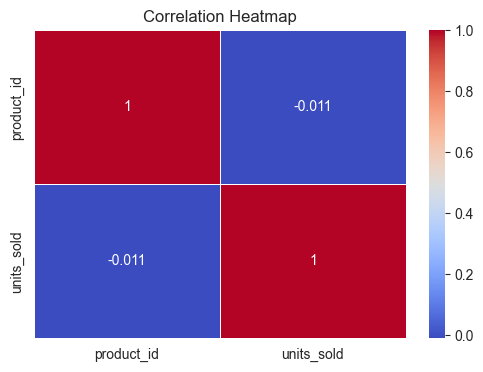

In [146]:
plt.figure(figsize=(6,4))
sns.heatmap(sales_data.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot – All Numeric Relationships

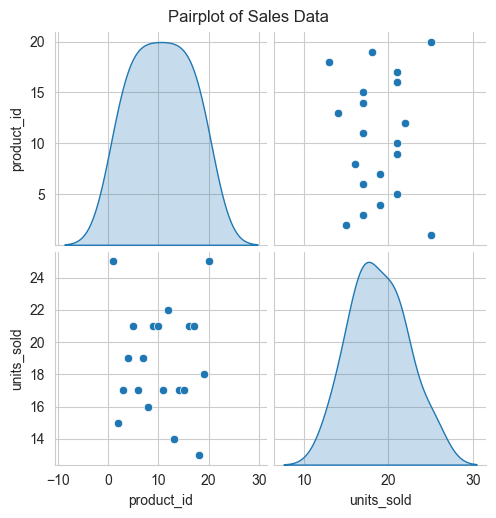

In [147]:
sns.pairplot(sales_data, diag_kind="kde")
plt.suptitle("Pairplot of Sales Data", y=1.02)
plt.show()

# Countplot – Frequency of Categories

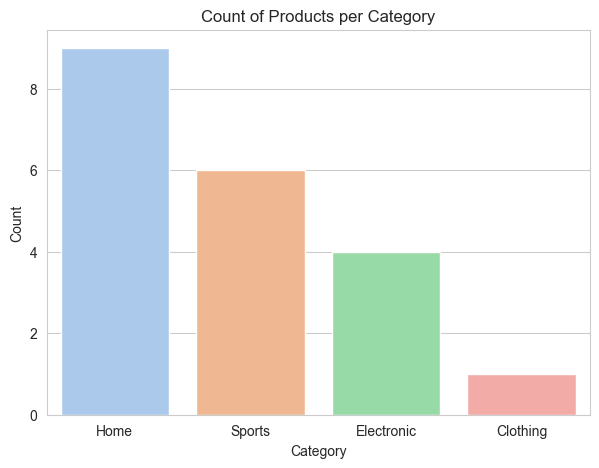

In [148]:
plt.figure(figsize=(7,5))
sns.countplot(x="category", data=sales_data, palette="pastel")
plt.title("Count of Products per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

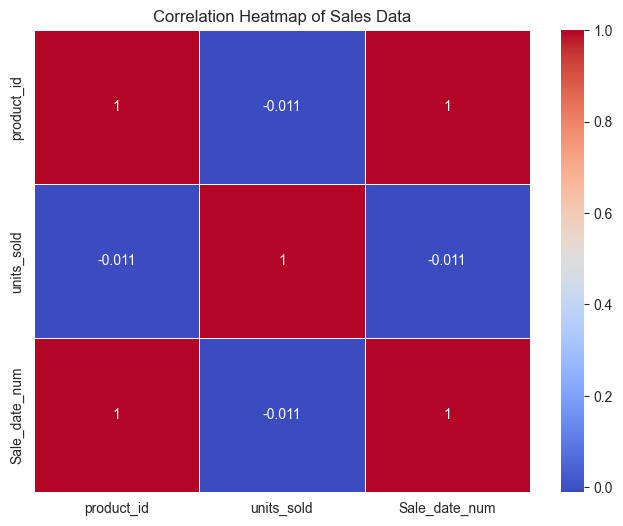

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Sale_date is datetime
sales_data["Sale_date"] = pd.to_datetime(sales_data["Sale_date"])

# Convert Sale_date to numeric (days since start) for correlation
sales_data["Sale_date_num"] = (sales_data["Sale_date"] - sales_data["Sale_date"].min()).dt.days

# Select numeric columns only
numeric_df = sales_data.select_dtypes(include=["int64", "float64", "int32", "float32"])

# Add the numeric Sale_date column
numeric_df["Sale_date_num"] = sales_data["Sale_date_num"]

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Sales Data")
plt.show()


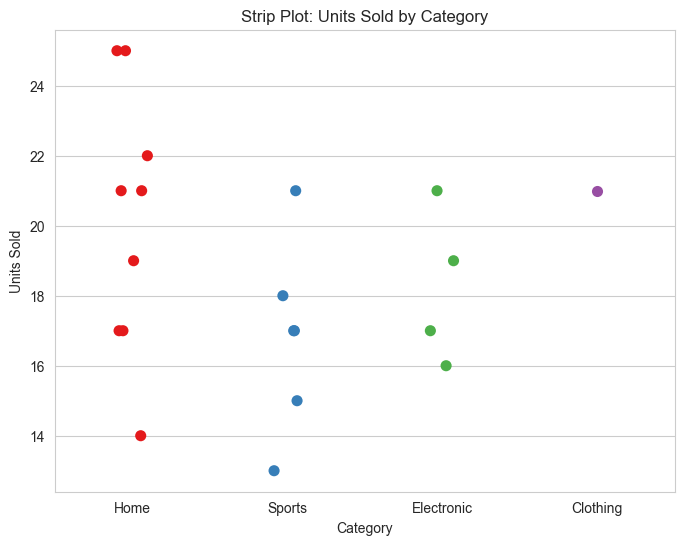

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.stripplot(x="category", y="units_sold", data=sales_data, jitter=True, palette="Set1", size=8)
plt.title("Strip Plot: Units Sold by Category")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.show()


# Swarm Plot

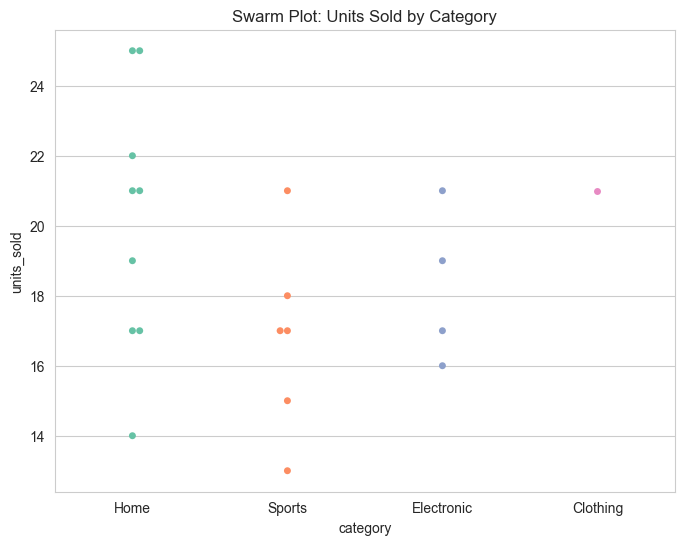

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.swarmplot(x="category", y="units_sold", data=sales_data, palette="Set2")
plt.title("Swarm Plot: Units Sold by Category")
plt.show()


# Point Plot

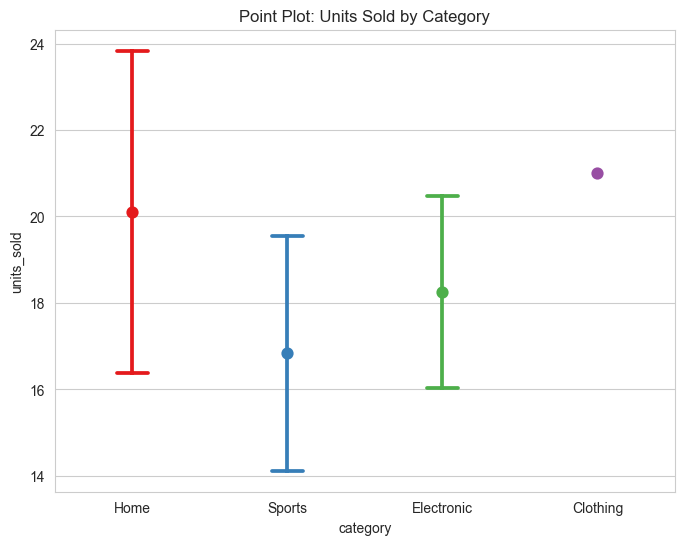

In [152]:
plt.figure(figsize=(8,6))
sns.pointplot(x="category", y="units_sold", data=sales_data, ci="sd", capsize=0.2, palette="Set1")
plt.title("Point Plot: Units Sold by Category")
plt.show()

# Boxen Plot

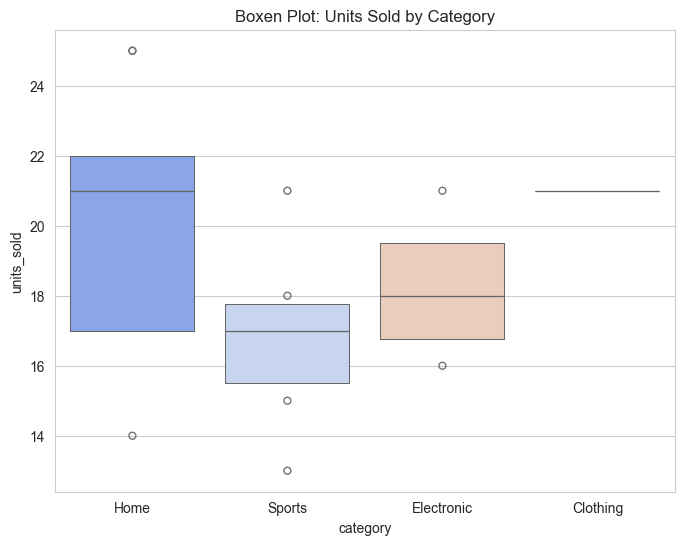

In [153]:
plt.figure(figsize=(8,6))
sns.boxenplot(x="category", y="units_sold", data=sales_data, palette="coolwarm")
plt.title("Boxen Plot: Units Sold by Category")
plt.show()

# ECDF Plot

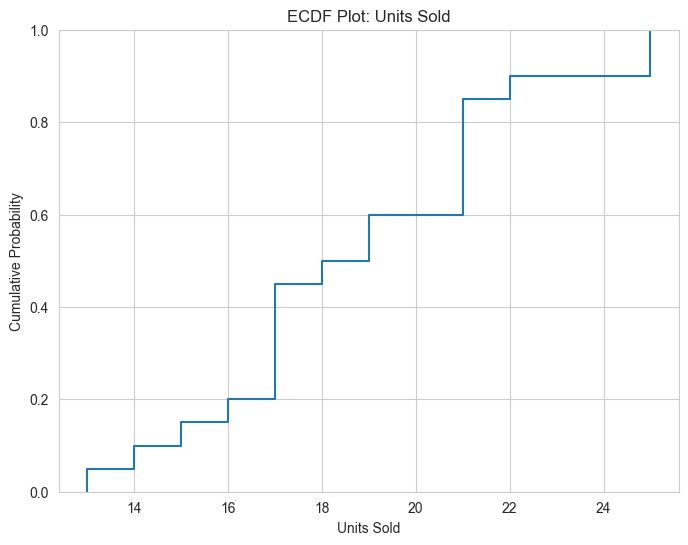

In [154]:
plt.figure(figsize=(8,6))
sns.ecdfplot(sales_data["units_sold"])
plt.title("ECDF Plot: Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Cumulative Probability")
plt.show()

# Rug Plot

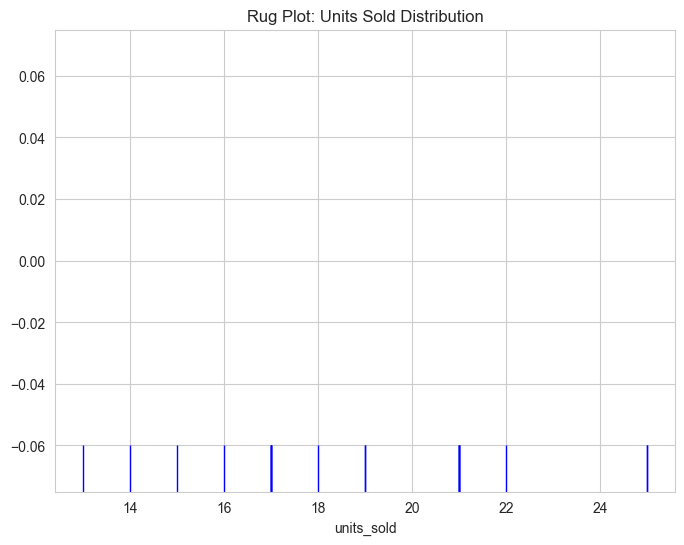

In [155]:
plt.figure(figsize=(8,6))
sns.rugplot(sales_data["units_sold"], height=0.1, color="blue")
plt.title("Rug Plot: Units Sold Distribution")
plt.show()

# Tree Map

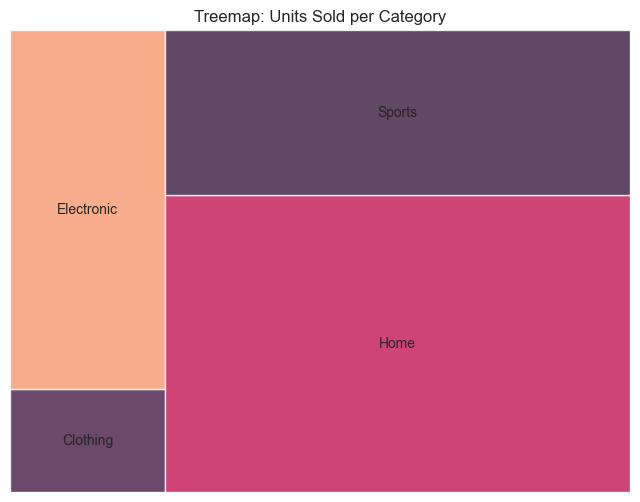

In [156]:
import squarify

category_sum = sales_data.groupby("category")["units_sold"].sum()
plt.figure(figsize=(8,6))
squarify.plot(sizes=category_sum.values, label=category_sum.index, alpha=0.8)
plt.title("Treemap: Units Sold per Category")
plt.axis("off")
plt.show()

In [157]:
print(sales_data.columns)


Index(['product_id', 'product_name', 'category', 'units_sold', 'Sale_date',
       'Sale_date_num'],
      dtype='object')


# 3-D Scatter Plot

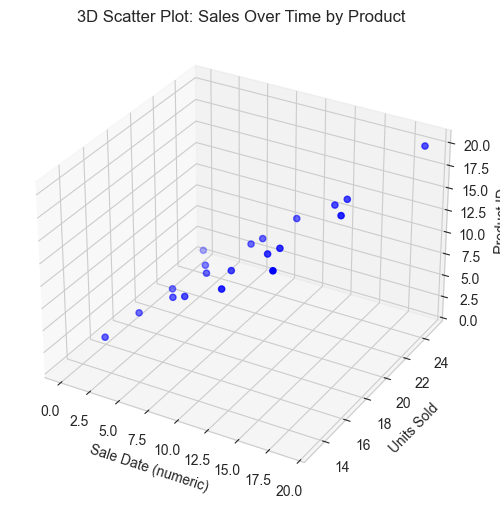

In [158]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    sales_data["Sale_date_num"],   # X-axis
    sales_data["units_sold"],      # Y-axis
    sales_data["product_id"],      # Z-axis
    c="blue",
    marker="o"
)

ax.set_xlabel("Sale Date (numeric)")
ax.set_ylabel("Units Sold")
ax.set_zlabel("Product ID")
plt.title("3D Scatter Plot: Sales Over Time by Product")
plt.show()



# Hexbin Plot

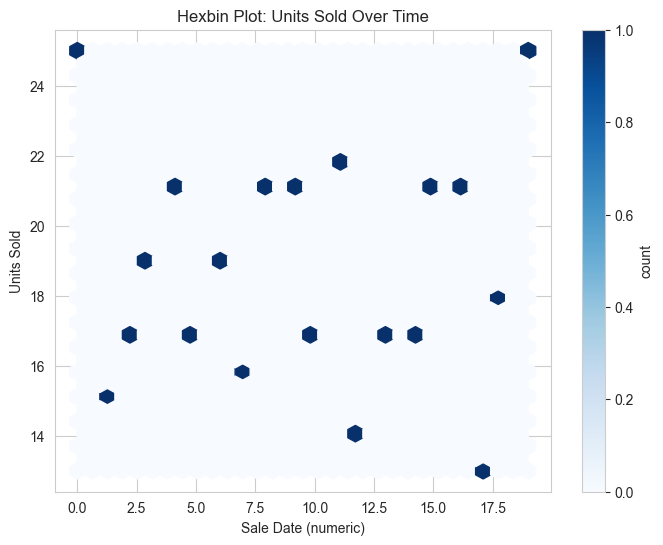

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hexbin(
    sales_data["Sale_date_num"],   # X-axis: numeric date
    sales_data["units_sold"],      # Y-axis: units sold
    gridsize=30,
    cmap="Blues"
)
plt.colorbar(label="count")
plt.title("Hexbin Plot: Units Sold Over Time")
plt.xlabel("Sale Date (numeric)")
plt.ylabel("Units Sold")
plt.show()


In [160]:
sales_data

,product_id,product_name,category,units_sold,Sale_date,Sale_date_num
0,1,Product1,Home,25,2023-01-01,0
1,2,Product2,Sports,15,2023-01-02,1
2,3,Product3,Electronic,17,2023-01-03,2
3,4,Product4,Home,19,2023-01-04,3
4,5,Product5,Home,21,2023-01-05,4
5,6,Product6,Sports,17,2023-01-06,5
6,7,Product7,Electronic,19,2023-01-07,6
7,8,Product8,Electronic,16,2023-01-08,7
8,9,Product9,Home,21,2023-01-09,8
9,10,Product10,Clothing,21,2023-01-10,9


In [161]:
{"product_id", "units_sold"}.issubset in sales_data.columns

False

In [162]:
{"product_id", "units_sold"}.issubset(sales_data.columns)

True

In [163]:
("product_id") and ("units_sold") in sales_data.columns

True

In [164]:
temp = pd.read_csv('C:/Users/umari/OneDrive/Desktop/FSDS DATASETs/sales_data.csv')

In [165]:
print(temp.columns.tolist())

['product_id', 'product_name', 'category', 'units_sold', 'Sale_date']


In [166]:
temp["Sale_date"] = pd.to_datetime(temp["Sale_date"], errors="coerce")

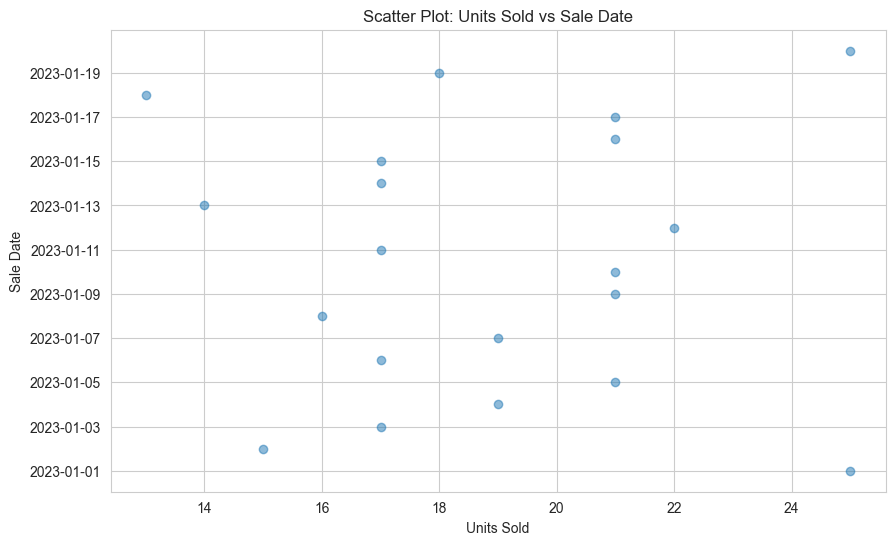

In [167]:
import matplotlib.pyplot as plt

# Make sure Sale_date is datetime
temp["Sale_date"] = pd.to_datetime(temp["Sale_date"], errors="coerce")

plt.figure(figsize=(10,6))
plt.scatter(temp["units_sold"], temp["Sale_date"], alpha=0.5)
plt.title("Scatter Plot: Units Sold vs Sale Date")
plt.xlabel("Units Sold")
plt.ylabel("Sale Date")
plt.show()



In [168]:
temp

,product_id,product_name,category,units_sold,Sale_date
0,1,Product1,Home,25,2023-01-01
1,2,Product2,Sports,15,2023-01-02
2,3,Product3,Electronic,17,2023-01-03
3,4,Product4,Home,19,2023-01-04
4,5,Product5,Home,21,2023-01-05
5,6,Product6,Sports,17,2023-01-06
6,7,Product7,Electronic,19,2023-01-07
7,8,Product8,Electronic,16,2023-01-08
8,9,Product9,Home,21,2023-01-09
9,10,Product10,Clothing,21,2023-01-10


<Axes: xlabel='units_sold', ylabel='Sale_date'>

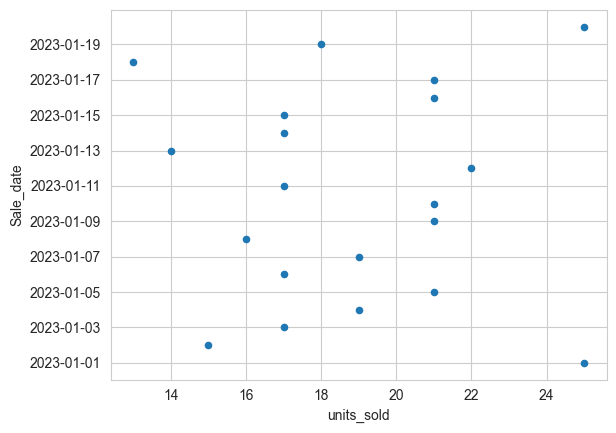

In [169]:
temp.plot(kind='scatter',x='units_sold',y='Sale_date')

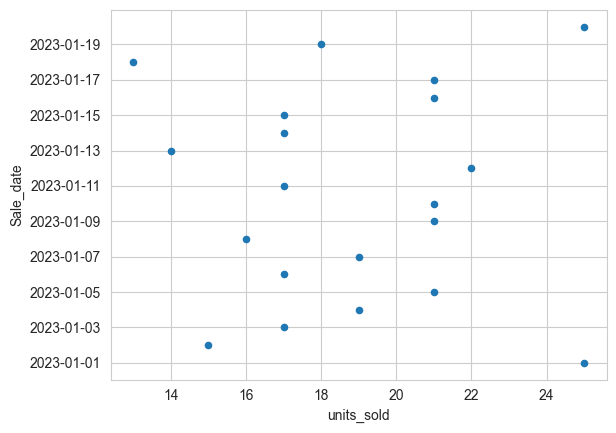

In [170]:
if "units_sold" and "Sale_date" in temp.columns:
    temp.plot(kind='scatter',x='units_sold',y='Sale_date')

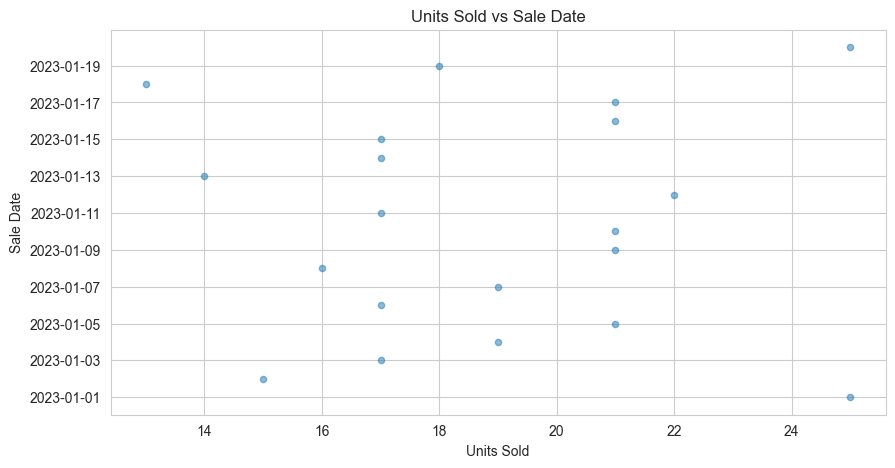

In [171]:
fig, ax = plt.subplots(figsize=(10, 5))
temp.plot(kind="scatter", x="units_sold", y="Sale_date", ax=ax, alpha=0.5)
ax.set_title("Units Sold vs Sale Date")
ax.set_xlabel("Units Sold")
ax.set_ylabel("Sale Date")
plt.show()


Scatter Plot: Units Sold vs. Sale_date


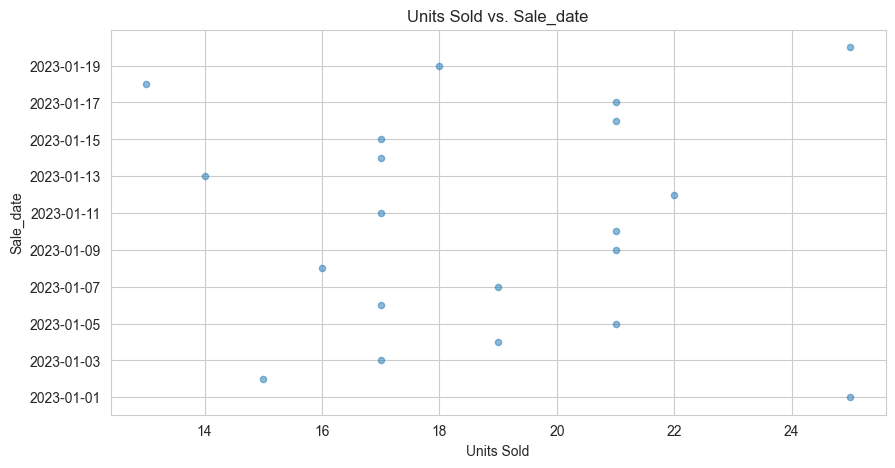

In [177]:
import matplotlib.pyplot as plt

print("Scatter Plot: Units Sold vs. Sale_date")

if {"Sale_date", "units_sold"}.issubset(sales_data.columns):
    fig, ax = plt.subplots(figsize=(10, 5))
    sales_data.plot(kind="scatter", x="units_sold", y="Sale_date", ax=ax, alpha=0.5)
    ax.set_title("Units Sold vs. Sale_date")
    ax.set_xlabel("Units Sold")
    ax.set_ylabel("Sale_date")
    plt.show()
else:
    print("Columns 'units_sold' and/or 'Sale_date' not found.")


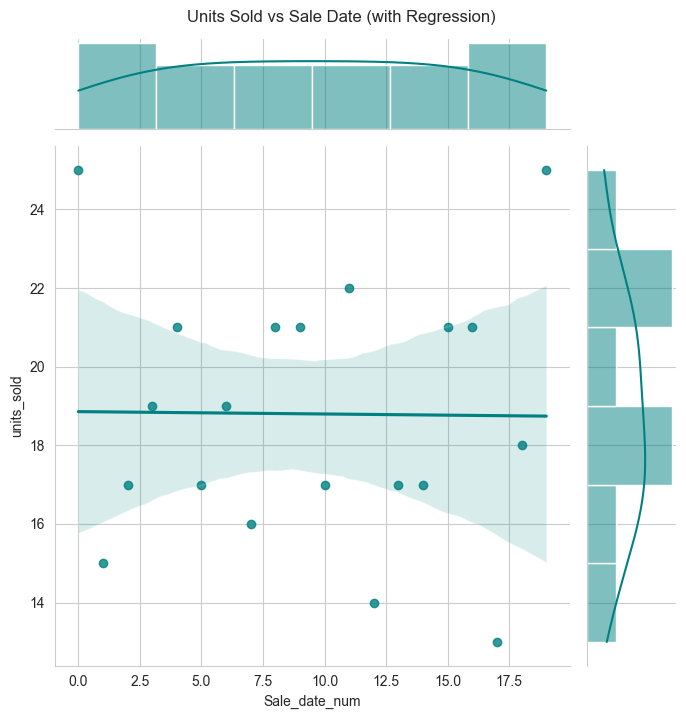

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in these columns
df = sales_data.dropna(subset=["Sale_date_num", "units_sold"])

# Create a jointplot with regression line
j = sns.jointplot(
    x="Sale_date_num",
    y="units_sold",
    data=df,
    kind="reg",   # regression + scatter
    height=7,
    color="teal"
)

j.fig.suptitle("Units Sold vs Sale Date (with Regression)", y=1.02)
plt.show()
